In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset.h5_image_dataset import H5ImageDataset
import h5py

In [12]:
import torch


def transform_voxel(voxel, transpose_to_CHW=False, norm_voxel = True):
    """
    Augment voxel and turn into tensor
    @param voxel Input voxel
    @param seed  Seed for random number generation
    @returns Augmented voxel
    """

    if transpose_to_CHW:
        voxel = torch.from_numpy(voxel.transpose(2, 0, 1)).float()# H,W,C -> C,H,W

    else:
        if norm_voxel:
            voxel = torch.from_numpy(voxel).float() / abs(max(voxel.min(), voxel.max(), key=abs))  # -1 ~ 1
        else:
            voxel = torch.from_numpy(voxel).float()

    # if self.vox_transform:
    #     random.seed(seed)
    #     voxel = self.vox_transform(voxel)
    return voxel

-2.686727
-0.46607748


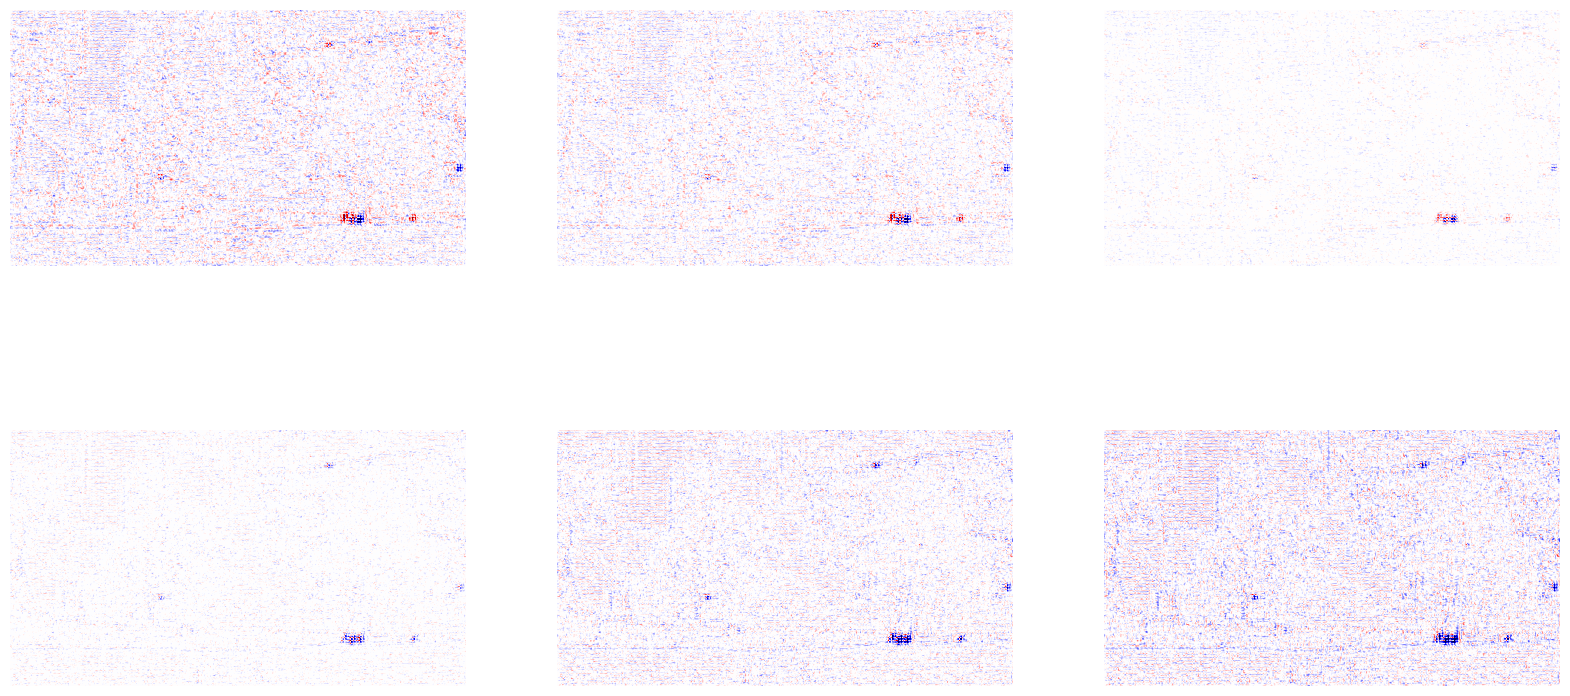

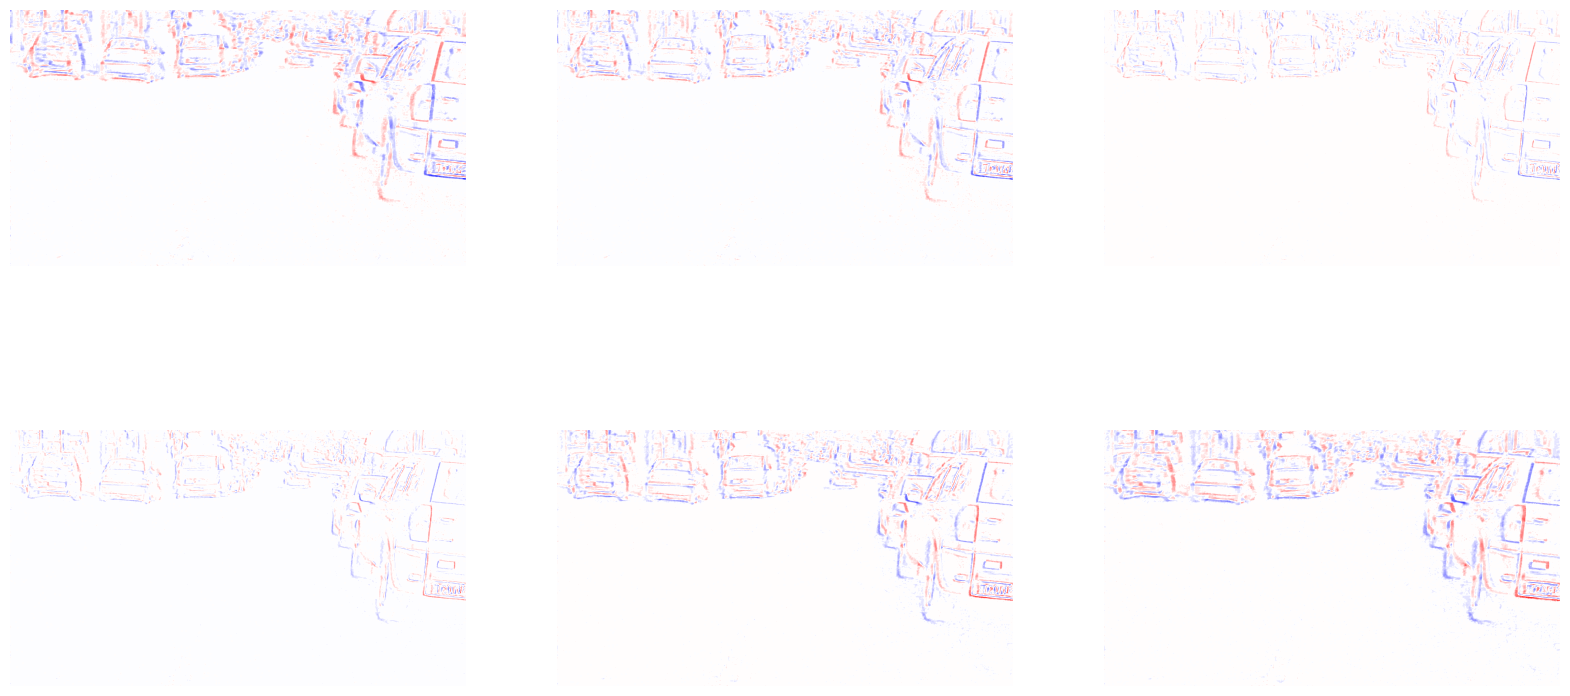

In [2]:
gen_event = np.load('/workspace/data/B2E_results/B2E_L2/Gopro_Event_Train_1280/GOPR0868_11_02/image000005/out.npy')
gen_event = np.transpose(gen_event,(2,0,1))
print(np.min(gen_event))
# max_val = np.max(np.abs(gen_event))
# gen_event = gen_event / max_val

# print(np.min(gen_event))


fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()
for i in range(6):
    channel_data = gen_event[i]  # shape: (H, W)
    im = axs[i].imshow(channel_data, cmap='seismic', vmin=-1, vmax=1)

    axs[i].axis('off')


gen_event = np.load('/workspace/data/B2E_results/B2E_NAFVAE//Gopro_Event_Train_NAFVAE_1280/GOPR0372_07_01/image000005/out.npy')
gen_event = np.transpose(gen_event,(2,0,1))
print(np.min(gen_event))
# max_val = np.max(np.abs(gen_event))
# gen_event = gen_event / max_val

# print(np.min(gen_event))


fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()
for i in range(6):
    channel_data = gen_event[i]  # shape: (H, W)
    im = axs[i].imshow(channel_data, cmap='seismic', vmin=-1, vmax=1)

    axs[i].axis('off')





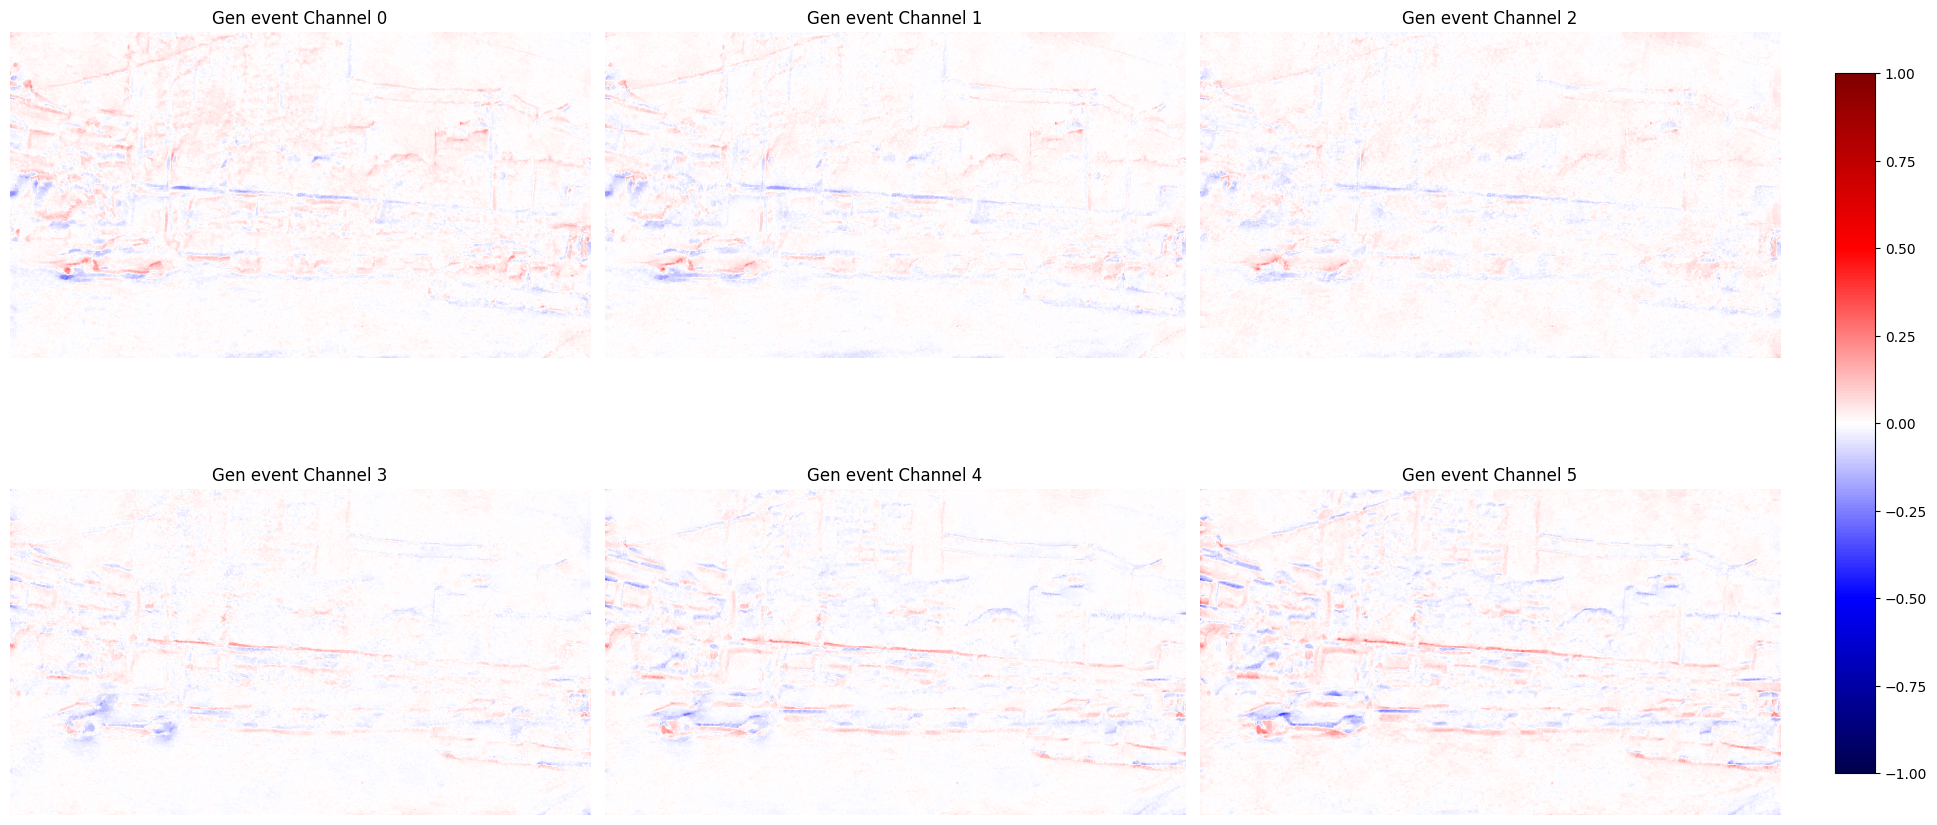

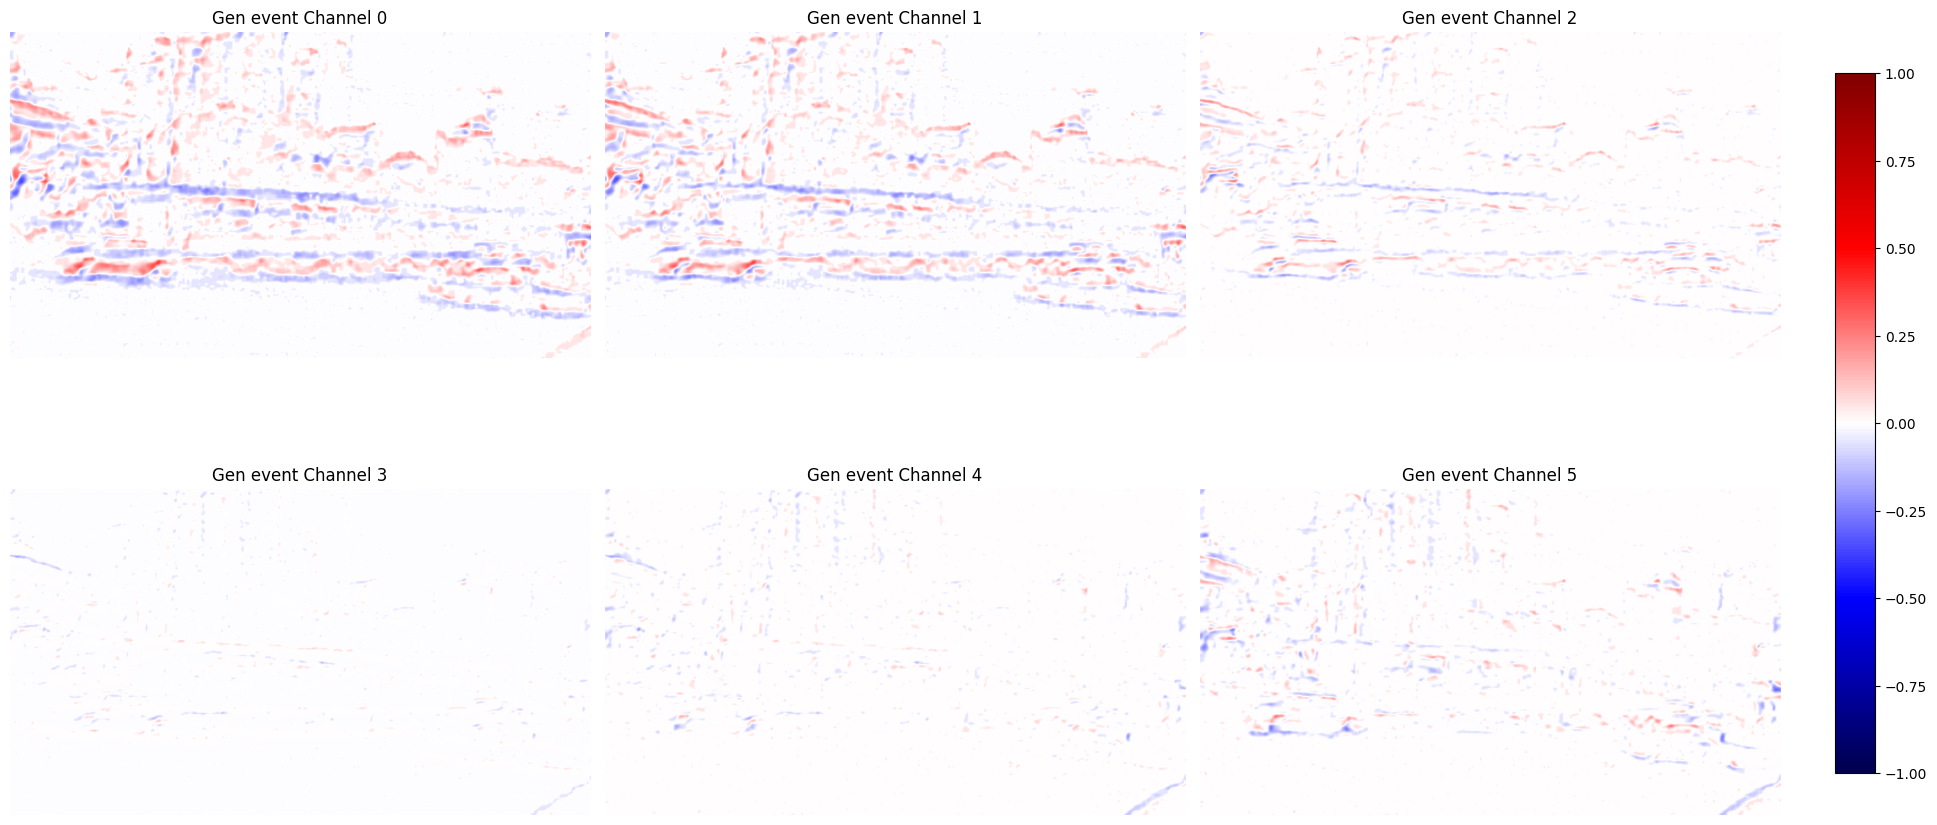

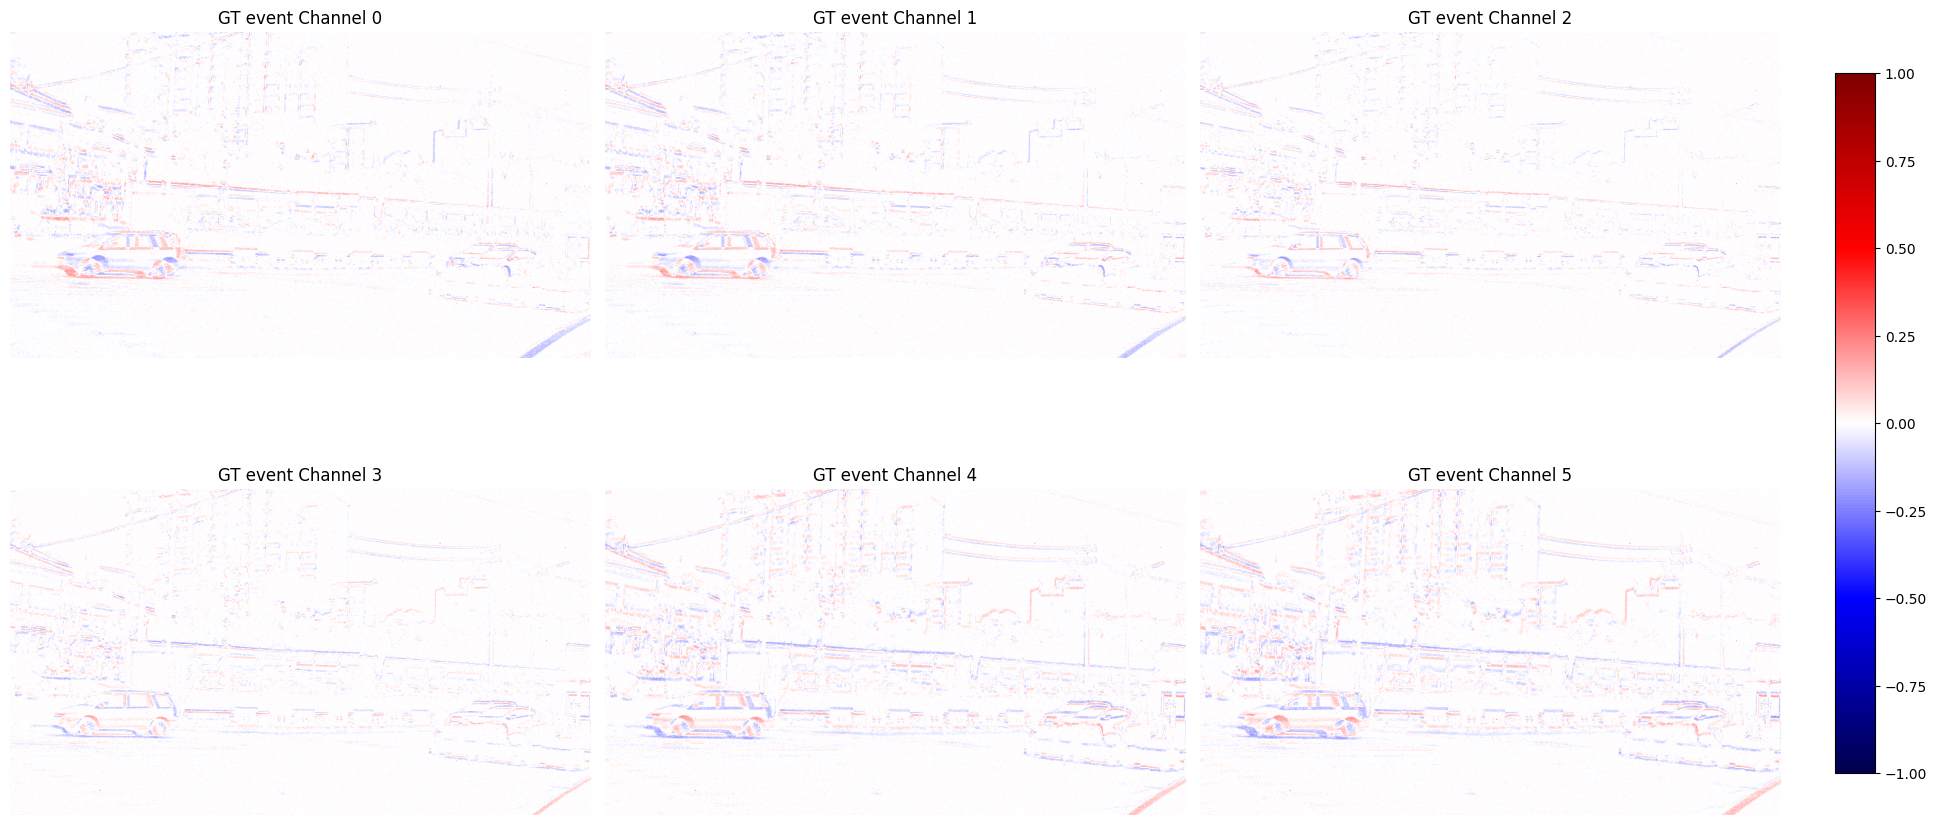

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import h5py

threshold = 0.0  # 기존에 사용한 threshold는 imshow에는 필요하지 않습니다.

# 데이터 로드
data_path = '/workspace/data/GOPRO/train/'
h5_folder = os.listdir(data_path)
h5_folder.sort()

idx = '000000012'
for h5 in h5_folder[4:]:
    imgs_path = os.path.join(data_path, h5)
    h5_file = h5py.File(imgs_path, 'r')
    break

event = h5_file['gen_event'][f'image{idx}'][:]
blur_img = h5_file['images'][f'image{idx}'][:]
voxel = h5_file['voxels'][f'voxel{idx}'][:]

blur_img = blur_img.transpose(1,2,0)
n_event = np.array(event)

voxel = np.array(voxel)
voxel = np.array(transform_voxel(voxel))
scene = h5[:-3]

# refine_event 데이터 로드
refine_event = h5_file['gen_event'][f'image{idx}'][:]


# ------------------------------
# 1. 원본 Gen event (Before refine) 시각화
# ------------------------------
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

for i in range(6):
    channel_data = event[i]  # shape: (H, W)
    im = axs[i].imshow(channel_data, cmap='seismic', vmin=-1, vmax=1)
    axs[i].set_title(f"Gen event Channel {i}")
    axs[i].axis('off')

# tight_layout으로 기본 정렬 후, 오른쪽에 별도의 컬러바 축 생성
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 전체 플롯의 오른쪽 공간 확보
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # (left, bottom, width, height)
fig.colorbar(im, cax=cbar_ax)
plt.show()


refine_event = h5_file['gen_event_NAF'][f'image{idx}'][:]


# ------------------------------
# 1. 원본 Gen event (Before refine) 시각화
# ------------------------------
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

for i in range(6):
    channel_data = refine_event[i]  # shape: (H, W)
    im = axs[i].imshow(channel_data, cmap='seismic', vmin=-1, vmax=1)
    axs[i].set_title(f"Gen event Channel {i}")
    axs[i].axis('off')

# tight_layout으로 기본 정렬 후, 오른쪽에 별도의 컬러바 축 생성
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 전체 플롯의 오른쪽 공간 확보
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # (left, bottom, width, height)
fig.colorbar(im, cax=cbar_ax)
plt.show()


# ------------------------------
# 3. GT event 시각화
# ------------------------------
efnet_event = voxel   # shape: (6, H, W)
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

for i in range(6):
    channel_data = efnet_event[i]  # shape: (H, W)
    im = axs[i].imshow(channel_data, cmap='seismic', vmin=-1, vmax=1)
    axs[i].set_title(f"GT event Channel {i}")
    axs[i].axis('off')

# tight_layout으로 기본 정렬 후, 오른쪽에 별도의 컬러바 축 생성
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 전체 플롯의 오른쪽 공간 확보
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # (left, bottom, width, height)
fig.colorbar(im, cax=cbar_ax)
plt.show()





In [5]:
test_mother_path = '/workspace/data/LOLBlur/test'
blur_path = os.path.join(test_mother_path, 'low_blur')

scene_folder = os.listdir(blur_path)
scene_folder.sort()

with open('dataset/paths/LOLBlur_test.txt', 'a') as f:

    for scene in scene_folder:
        blur_imgs = os.listdir(os.path.join(blur_path, scene))
        blur_imgs.sort()
        for blur in blur_imgs:
            blur_img_path = os.path.join(blur_path, scene, blur)
            f.write(f'{blur_img_path}\n')
            

In [2]:
test_mother_path = '/workspace/data/LOLBlur/train'
blur_path = os.path.join(test_mother_path, 'low_blur')

scene_folder = os.listdir(blur_path)
scene_folder.sort()

with open('dataset/paths/LOLBlur_train.txt', 'a') as f:

    for scene in scene_folder:
        blur_imgs = os.listdir(os.path.join(blur_path, scene))
        blur_imgs.sort()
        for blur in blur_imgs:
            blur_img_path = os.path.join(blur_path, scene, blur)
            f.write(f'{blur_img_path}\n')
            